In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('dadosforms.csv', index_col = None, squeeze = True)
df_clean = df.replace('Discordo totalmente',1).replace('Discordo', 2).replace('Nem discordo, nem concordo',3).replace('Concordo totalmente',5).replace('Concordo', 4)
df_clean.columns = ['data', 'email', 'idade', 'plataforma', 'cursou', 'frequencia', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', 'gostou', 'melhoras', 'comentarios']

In [3]:
def plotComparison(group, cols):
    ax = group[cols].plot.barh(stacked=True, color=['#ff5959', '#ffb35c', '#ffff9e', '#82bf81', '#007a68'], fontsize=22)
    plt.tight_layout(rect=(0, 0, 2.5, 2))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: str(y)+'%')) 
def createNewGroup(df, name, cols):
    dictionary = {name:[0, 0, 0, 0, 0, 0]}
    for index, item in df.iterrows():
        for col in cols:
            dictionary[name][int(item[col]) - 1] += 1
            dictionary[name][5] += 1
    dictionary[name][0] = float('% 6.2f' % (dictionary[name][0] / dictionary[name][5] * 100))
    dictionary[name][1] = float('% 6.2f' % (dictionary[name][1] / dictionary[name][5] * 100))
    dictionary[name][2] = float('% 6.2f' % (dictionary[name][2] / dictionary[name][5] * 100))
    dictionary[name][3] = float('% 6.2f' % (dictionary[name][3] / dictionary[name][5] * 100))
    dictionary[name][4] = float('% 6.2f' % (dictionary[name][4] / dictionary[name][5] * 100))
    return  pd.DataFrame.from_dict(dictionary, orient='index', columns=['1', '2', '3', '4', '5', 'total'])

In [4]:
questions = [str(i) for i in range(1, 33)]
aprendizagempercebida = ['31', '32']
relevancia = ['27', '28', '29', '30']
atencaofocada = ['24', '25', '26']
diversao = ['22', '23']
interacaosocial = ['19', '20', '21']
satisfacao = ['15', '16', '17', '18']
desafio = ['12', '13', '14']
confianca = ['10', '11']
acessibilidade = ['8', '9']
operabilidade = ['6', '7']
aprendizibilidade = ['3', '4', '5']
estetica = ['1', '2']

,1,2,3,4,5,total
Total,7.99,4.51,12.85,31.60,43.06,288
Aprendizagem percebida,0.00,5.56,5.56,38.89,50.00,18
Relevância,0.00,5.56,13.89,22.22,58.33,36
Atenção focada,7.41,11.11,29.63,18.52,33.33,27
Diversão,11.11,0.00,5.56,22.22,61.11,18
Interação social,25.93,3.70,29.63,22.22,18.52,27
Satisfação,16.67,2.78,11.11,30.56,38.89,36
Desafio,7.41,3.70,0.00,37.04,51.85,27
Confiança,5.56,0.00,11.11,38.89,44.44,18
Acessibilidade,5.56,0.00,5.56,22.22,66.67,18


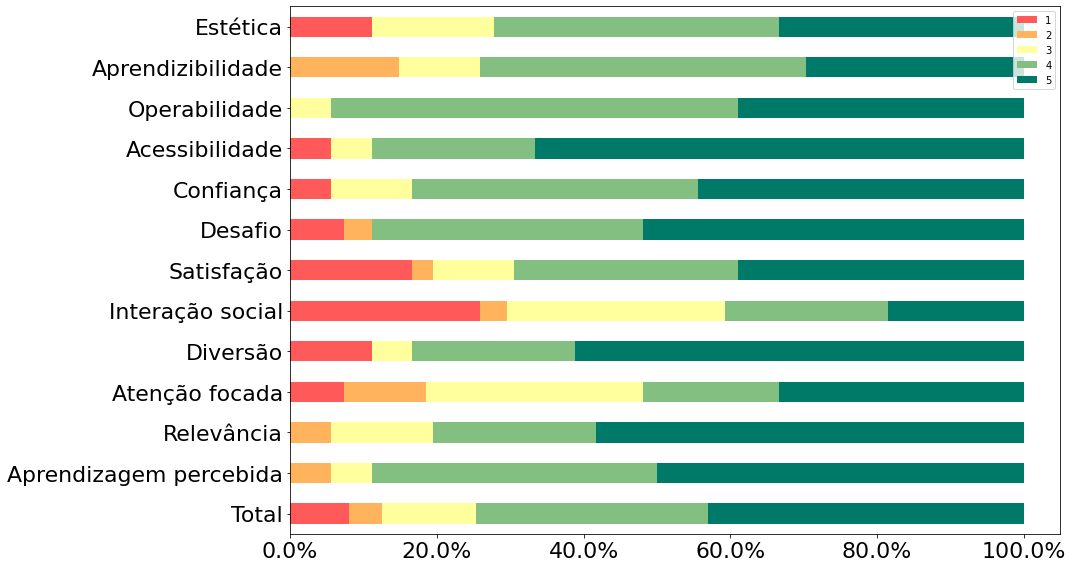

In [5]:
general = pd.concat([createNewGroup(df_clean[questions], 'Total', questions),
                     createNewGroup(df_clean, 'Aprendizagem percebida',aprendizagempercebida),
                     createNewGroup(df_clean, 'Relevância', relevancia),
                     createNewGroup(df_clean, 'Atenção focada', atencaofocada),
                     createNewGroup(df_clean, 'Diversão', diversao),
                     createNewGroup(df_clean, 'Interação social', interacaosocial),
                     createNewGroup(df_clean, 'Satisfação', satisfacao),
                     createNewGroup(df_clean, 'Desafio', desafio),
                     createNewGroup(df_clean, 'Confiança', confianca),
                     createNewGroup(df_clean, 'Acessibilidade', acessibilidade),
                     createNewGroup(df_clean, 'Operabilidade', operabilidade),
                     createNewGroup(df_clean, 'Aprendizibilidade', aprendizibilidade),
                     createNewGroup(df_clean, 'Estética', estetica),
                     ])
plotComparison(general, ['1', '2', '3', '4', '5'])
general

,1,2,3,4,5,total
Cursaram,0.0,16.67,16.67,33.33,33.33,18
Não cursaram,0.0,11.11,0.00,66.67,22.22,9


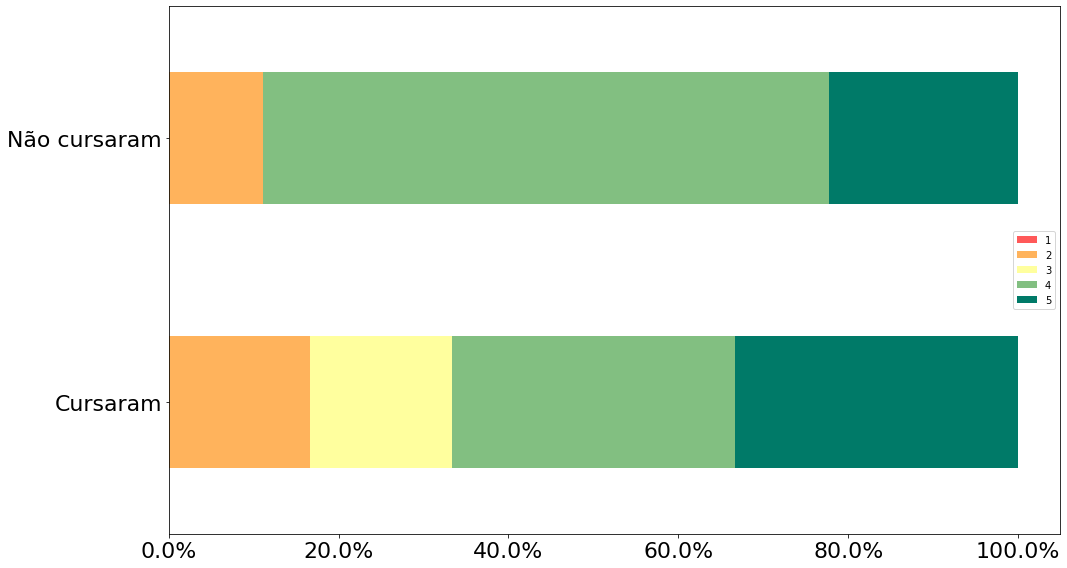

In [6]:
cursou = pd.concat([createNewGroup(df_clean[(df_clean['cursou'] == 'Sim')], 'Cursaram', aprendizibilidade),
                    createNewGroup(df_clean[(df_clean['cursou'] != 'Sim')], 'Não cursaram', aprendizibilidade)])
plotComparison(cursou, ['1', '2', '3', '4', '5'])
cursou

,1,2,3,4,5,total
Cursaram,0.00,0.0,8.33,41.67,50.00,12
Não cursaram,16.67,0.0,16.67,33.33,33.33,6


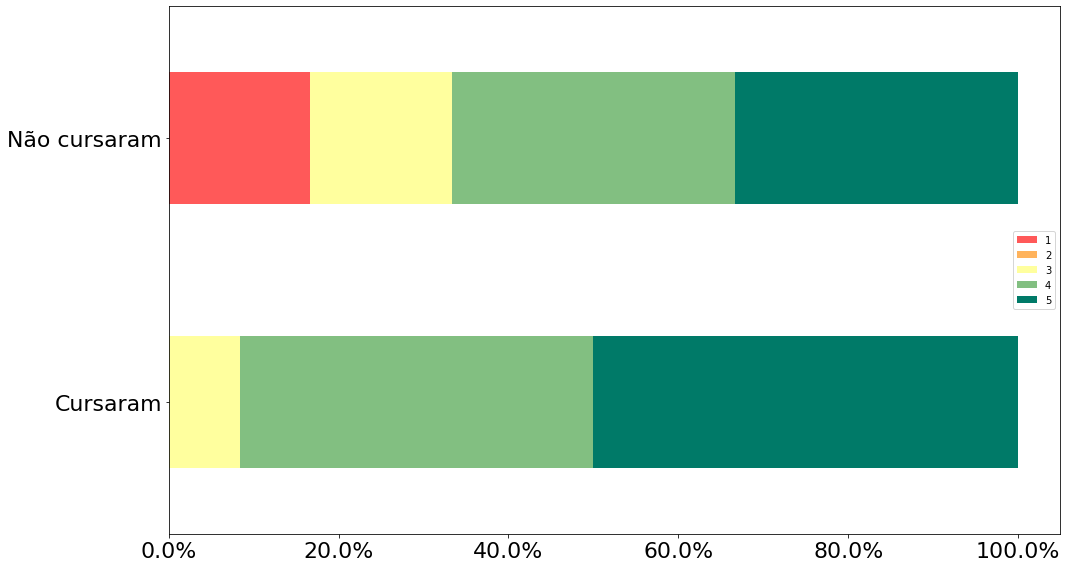

In [7]:
confia= pd.concat([createNewGroup(df_clean[(df_clean['cursou'] == 'Sim')], 'Cursaram', confianca),
                    createNewGroup(df_clean[(df_clean['cursou'] != 'Sim')], 'Não cursaram', confianca)])
plotComparison(confia, ['1', '2', '3', '4', '5'])
confia

,1,2,3,4,5,total
Cursaram,0.0,0.00,0.00,25.00,75.0,12
Não cursaram,0.0,16.67,16.67,66.67,0.0,6


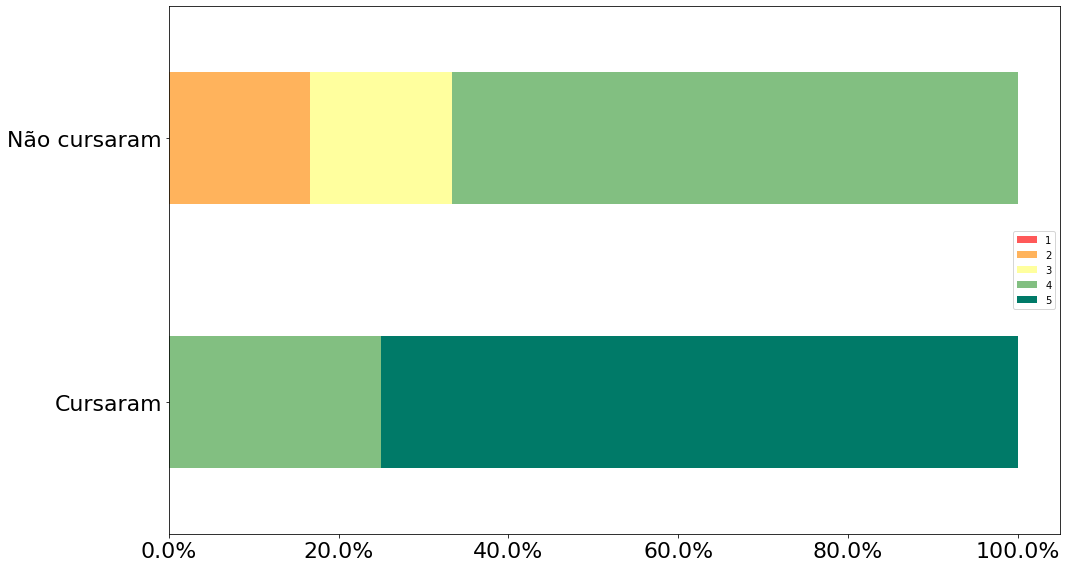

In [8]:
aprendizagem = pd.concat([createNewGroup(df_clean[(df_clean['cursou'] == 'Sim')], 'Cursaram', aprendizagempercebida),
                    createNewGroup(df_clean[(df_clean['cursou'] != 'Sim')], 'Não cursaram', aprendizagempercebida)])
plotComparison(aprendizagem, ['1', '2', '3', '4', '5'])
aprendizagem

,1,2,3,4,5,total
PC,16.67,0.0,16.67,0.00,66.67,6
Mobile,0.00,0.0,0.00,33.33,66.67,12


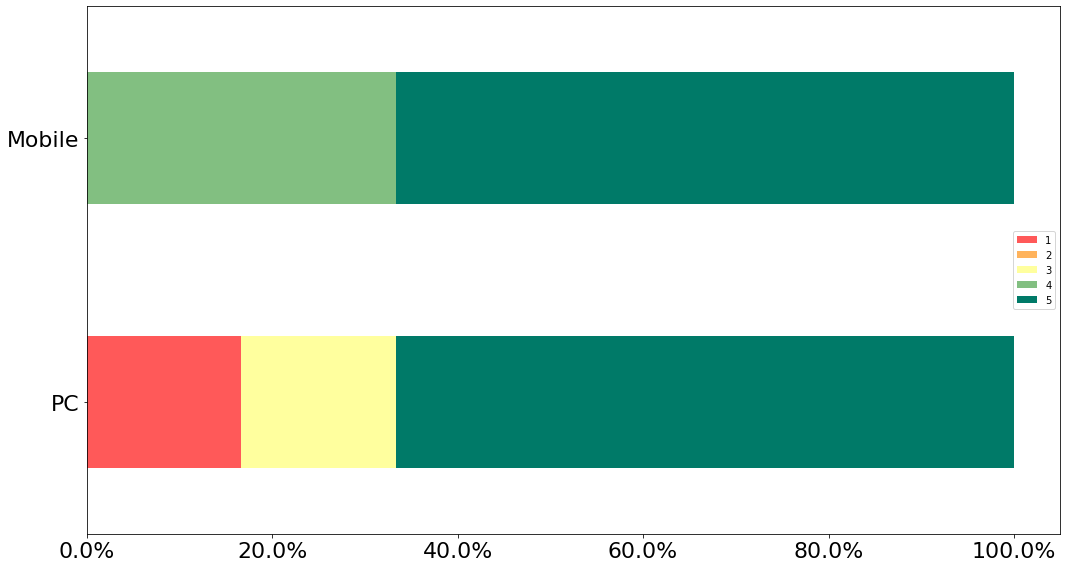

In [9]:
nao_pc = pd.concat([createNewGroup(df_clean[(df_clean['plataforma'] == 'PC')], 'PC', acessibilidade),
                    createNewGroup(df_clean[(df_clean['plataforma'] != 'PC')], 'Mobile', acessibilidade)])
plotComparison(nao_pc, ['1', '2', '3', '4', '5'])
nao_pc

,1,2,3,4,5,total
Cursaram,0.0,4.17,4.17,12.50,79.17,24
Não cursaram,0.0,8.33,33.33,41.67,16.67,12


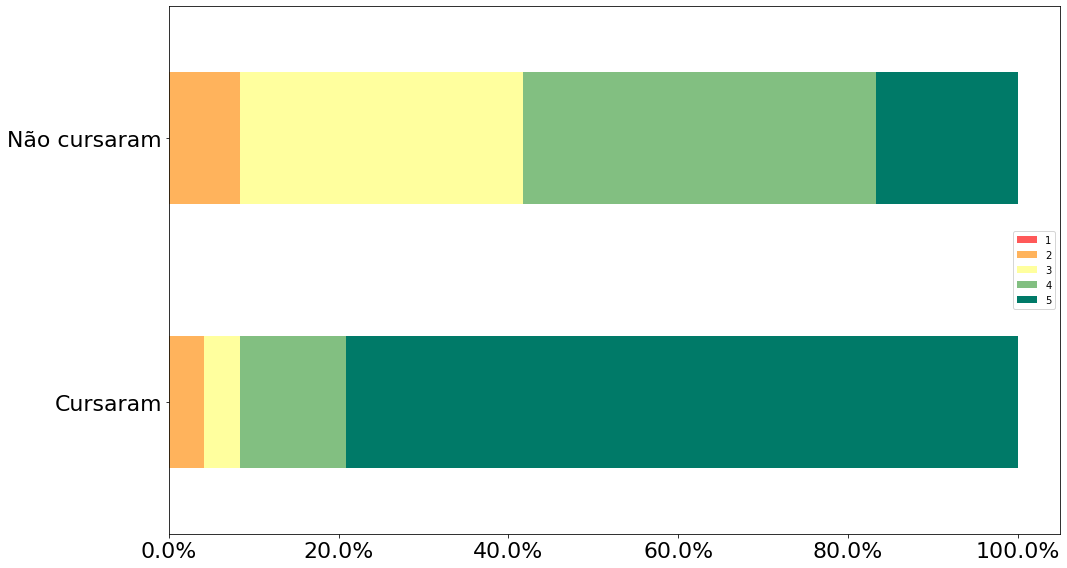

In [10]:
relev = pd.concat([createNewGroup(df_clean[(df_clean['cursou'] == 'Sim')], 'Cursaram', relevancia),
                    createNewGroup(df_clean[(df_clean['cursou'] != 'Sim')], 'Não cursaram', relevancia)])
plotComparison(relev, ['1', '2', '3', '4', '5'])
relev